In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import normaltest,pearsonr
from scipy import stats
import matplotlib.pyplot as plt
import pickle
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
df_colest = pd.read_csv('database/Diabetes_ClassificationColesterol.csv')
df_colest

,Cholesterol,Glicose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes
0,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,227,105,44,"5,2",83,female,59,125,"25,2",150,90,35,40,"0,88",No diabetes
386,226,279,52,"4,3",84,female,60,192,"37,5",144,88,41,48,"0,85",Diabetes
387,301,90,118,"2,6",89,female,61,115,"21,7",218,90,31,41,"0,76",No diabetes
388,232,184,114,2,91,female,61,127,24,170,82,35,38,"0,92",Diabetes


In [3]:
df_colest = df_colest[['Age','BMI','Diastolic BP','Cholesterol']]
df_colest = df_colest.rename(columns={'Diastolic BP':'DiastolicBloodPressure','Cholesterol':'colesterol'})

In [36]:
df_colest['BMI'] =df_colest['BMI'].str.replace(',', '.', regex=True)
df_colest['BMI'] = df['BMI'].astype(float)
df_colest.describe()

,Age,BMI,DiastolicBloodPressure,colesterol
count,390.000000,390.000000,390.000000,390.000000
mean,46.774359,27.392205,83.289744,207.230769
std,16.435911,5.415382,13.498192,44.666005
min,19.000000,19.000000,48.000000,78.000000
25%,34.000000,23.000000,75.000000,179.000000
50%,44.500000,26.000000,82.000000,203.000000
75%,60.000000,31.150000,90.000000,229.000000
max,92.000000,47.000000,124.000000,443.000000


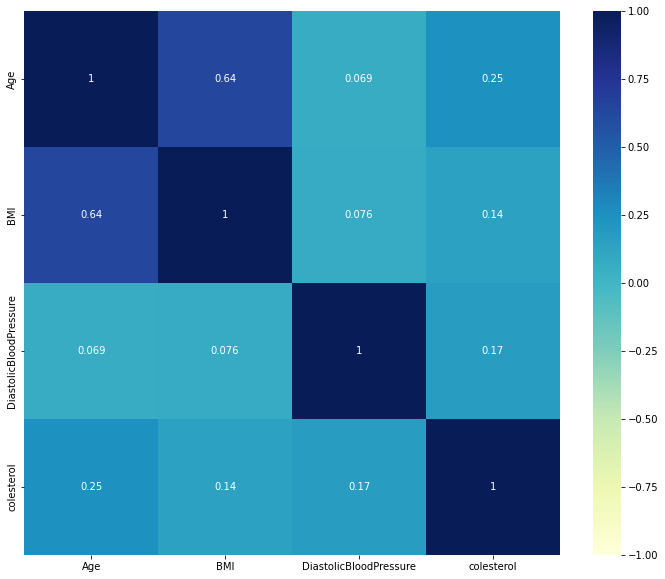

In [37]:
correlacao = df_colest.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, annot=True, vmin=-1, vmax=1,cmap="YlGnBu")
plt.show()

In [38]:
x_col = df_colest.iloc[:,0:3].values
y_col = df_colest.iloc[:,3].values

In [39]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x_col, y_col, \
                                                                  test_size=0.25,random_state=0)

In [40]:
modelo_col = LinearRegression()
modelo_col.fit(x_treinamento,y_treinamento)

LinearRegression()

In [41]:
modelo_col.coef_

array([ 0.66687425, -0.23971684,  0.6293967 ])

In [42]:
modelo_col.score(x_treinamento,y_treinamento)

0.08638260292154509

In [43]:
modelo_col.score(x_teste,y_teste)

0.06734594871282162

In [44]:
previsoes = modelo_col.predict(x_teste)
mean_absolute_error(y_teste,previsoes)

31.99819199215215

In [45]:
with open('modelo/colesterol.pkl', 'wb') as file:
    pickle.dump(modelo_col, file)

# DataSet para HBA1C

In [14]:
df = pd.read_csv('database/diabetesTeste.csv')
del df['ID']
del df['No_Pation']

In [15]:
df['CLASS'] = df['CLASS'].map({'Y ':'Y',
                               'Y':'Y',
                               'P ':'Y',
                               'P':'Y',
                               'N':'N',
                               'N ':'N'},
                             na_action=None)

In [16]:
df['CLASS'].unique()
le = preprocessing.LabelEncoder()
df['CLASS'] = le.fit_transform(df['CLASS'])
df

,Sexo,AGE,Ureia,Creatinina,HbA1c,Colesterol,Triglicerideos,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,1
996,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,1
997,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,1
998,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,1


In [17]:
df['Colesterol']=df['HDL']+df['LDL']+df['VLDL']*100
df.rename(columns={'Colesterol':'colesterol'})

,Sexo,AGE,Ureia,Creatinina,HbA1c,colesterol,Triglicerideos,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,53.8,0.9,2.4,1.4,0.5,24.0,0
1,M,26,4.5,62,4.9,63.2,1.4,1.1,2.1,0.6,23.0,0
2,F,50,4.7,46,4.9,53.8,0.9,2.4,1.4,0.5,24.0,0
3,F,50,4.7,46,4.9,53.8,0.9,2.4,1.4,0.5,24.0,0
4,M,33,7.1,46,4.9,42.8,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,71,11.0,97,7.0,63.0,1.7,1.2,1.8,0.6,30.0,1
996,M,31,3.0,60,12.3,1543.1,2.2,0.7,2.4,15.4,37.2,1
997,M,30,7.1,81,6.7,813.6,1.1,1.2,2.4,8.1,27.4,1
998,M,38,5.8,59,6.7,1404.5,2.0,1.6,2.9,14.0,40.5,1


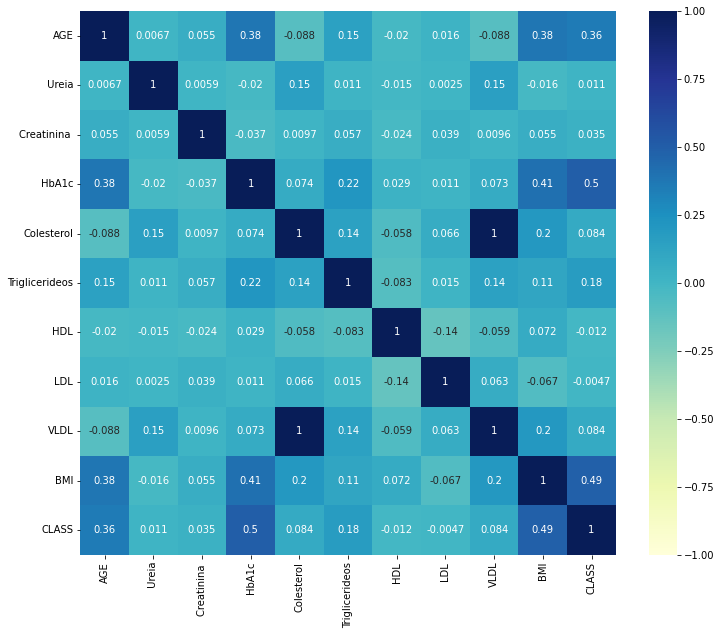

In [18]:
correlacao = df.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, annot=True, vmin=-1, vmax=1,cmap="YlGnBu")
plt.show()

In [19]:
df = df[['AGE','BMI','Colesterol','HbA1c']]
df

,AGE,BMI,Colesterol,HbA1c
0,50,24.0,53.8,4.9
1,26,23.0,63.2,4.9
2,50,24.0,53.8,4.9
3,50,24.0,53.8,4.9
4,33,21.0,42.8,4.9
...,...,...,...,...
995,71,30.0,63.0,7.0
996,31,37.2,1543.1,12.3
997,30,27.4,813.6,6.7
998,38,40.5,1404.5,6.7


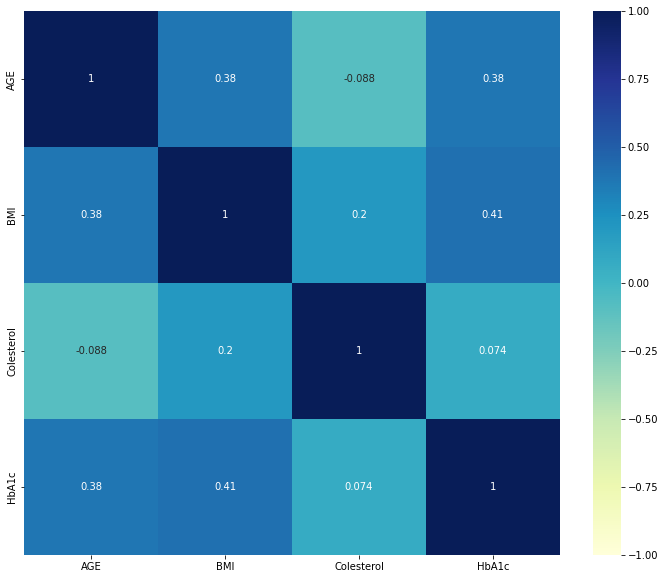

In [20]:
correlacao = df.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, annot=True, vmin=-1, vmax=1,cmap="YlGnBu")
plt.show()

In [21]:
x_hb = df.iloc[:,0:3].values
y_hb = df.iloc[:,3].values

In [22]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x_hb, y_hb, \
                                                                  test_size=0.25,random_state=0)

In [23]:
modelo_hba1c = LinearRegression()
modelo_hba1c.fit(x_treinamento,y_treinamento)

LinearRegression()

In [24]:
modelo_hba1c.coef_

array([0.08334857, 0.13343193, 0.00035964])

In [25]:
modelo_hba1c.score(x_treinamento,y_treinamento)

0.22980383672081728

In [26]:
modelo_hba1c.score(x_teste,y_teste)

0.21250016790612314

In [27]:
previsoes = modelo_hba1c.predict(x_teste)
mean_absolute_error(y_teste,previsoes)

1.8378955781892632

In [28]:
with open('modelo/hba1c.pkl', 'wb') as file:
    pickle.dump(modelo_hba1c, file)